# Reproduce results

<div style="color:red; font-size:14px;">!! Don't define functions here, import them from utils.py</div>

This notebook loads the trained models from disk and shows the results obtained with them.

## Imports

In [8]:
import pandas as pd
import pickle

from skseq.id_feature import IDFeatures
from skseq.extended_feature import ExtendedFeatures
from skseq.structured_perceptron import StructuredPerceptron

from utils.utils import *

from tensorflow.keras.models import load_model
from transformers import TFBertModel

## Create Train, Test and Tiny Test sets

In [11]:
train = pd.read_csv("data/train_data_ner.csv")
test = pd.read_csv("data/test_data_ner.csv")

In [12]:
X_train, y_train = get_data_target_sets(train)
X_test, y_test = get_data_target_sets(test)
X_tiny, y_tiny = get_tiny_test()

Processing: 100%|██████████| 38367/38367 [00:39<00:00, 968.94sentence/s]


### Create Corpus

In [4]:
word_dict, tag_dict, tag_dict_rev = create_corpus(X_train, y_train)

### Create Sequence List

In [5]:
train_seq = create_sequence_list(word_dict, tag_dict, X_train, y_train)

Adding sequences: 100%|██████████| 38366/38366 [15:15<00:00, 41.91sequence/s]


### Create True Tags

In [6]:
train_tag_pos = [[tag_dict[i] for i in tag_list] for tag_list in y_train]
y_train_true = [tag for array in train_tag_pos for tag in array]

test_tag_pos = [[tag_dict[i] for i in tag_list] for tag_list in y_test]
y_test_true = [tag for array in test_tag_pos for tag in array]

tiny_tag_pos = [[tag_dict[i] for i in tag_list] for tag_list in y_tiny]
y_tiny_true = [tag for array in tiny_tag_pos for tag in array]

## Evaluate Models

<div class="alert" style="padding: 20px;background-color: #2cbc84; color: white; margin-bottom: 15px;">
<h3>Structured Perceptron w/ Default Features</h3>
</div>

### Load Model

In [7]:
feature_mapper = IDFeatures(train_seq)
feature_mapper.build_features()

sp = StructuredPerceptron(word_dict, tag_dict, feature_mapper)
sp.load_model(dir='fitted_models/01_SP_Default_Features')

### Evaluate Model

#### Train set

In [8]:
y_train_pred = predict_SP(sp, X_train)

Predicting tags: 100%|██████████| 38366/38366 [09:46<00:00, 65.37sequence/s]


Accuracy: 0.9683
F1 Score: 0.9682


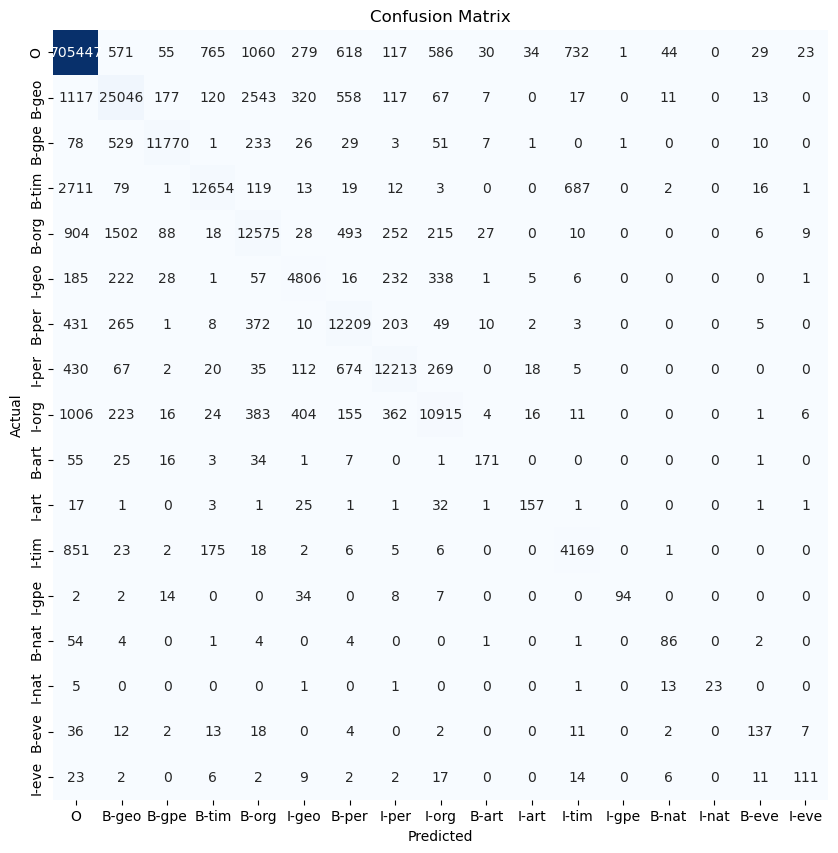

In [11]:
evaluate(y_train_true, y_train_pred, tag_dict_rev)

#### Test set

In [50]:
y_test_pred = predict_SP(sp, X_test)

Predicting tags: 100%|██████████| 38367/38367 [10:14<00:00, 62.44sequence/s]


Accuracy: 0.8808
F1 Score: 0.8579


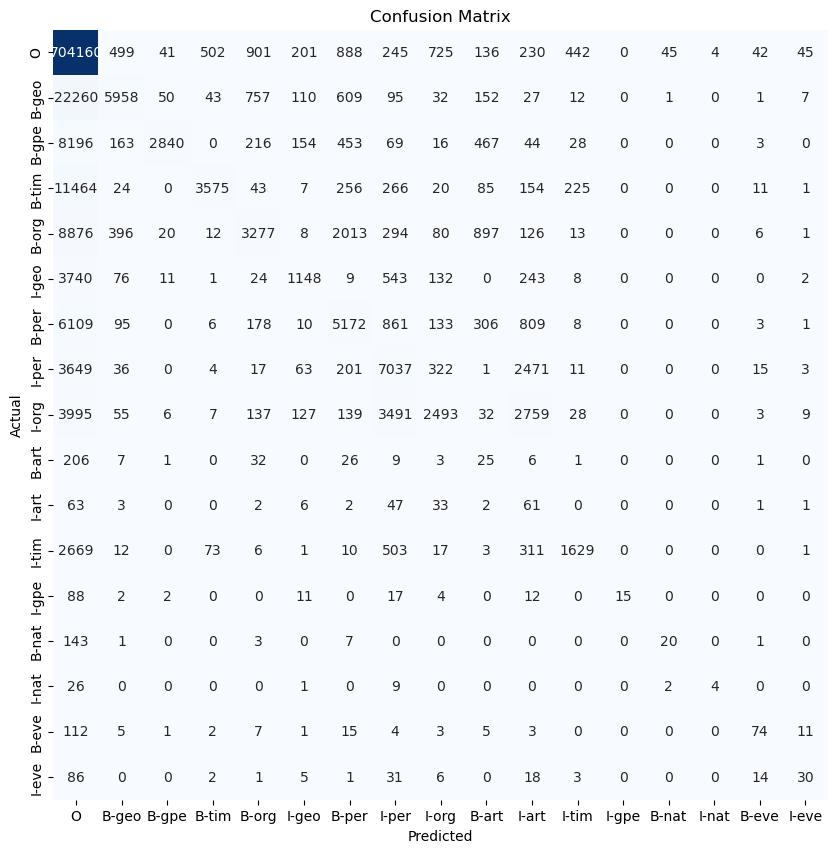

In [86]:
evaluate(y_test_true, y_test_pred, tag_dict_rev)

#### Tiny Test set

In [52]:
y_tiny_pred = predict_SP(sp, X_tiny)

Predicting tags: 100%|██████████| 13/13 [00:00<00:00, 163.66sequence/s]


In [75]:
print_tiny_test_prediction(X_tiny, sp, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-geo might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

The/O programmers/O from/O Barchelona/O cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

Jack/B-per London/B-geo went/O to/O Parris/O ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/I-per and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/O would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O U.S.A/O though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-org States/I-org of/I-org America/I-org though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 

Robin/O does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 

Apple/O is/O a/O great/O company/O ./O 

I/O really/O lov

Accuracy: 0.8973
F1 Score: 0.8934


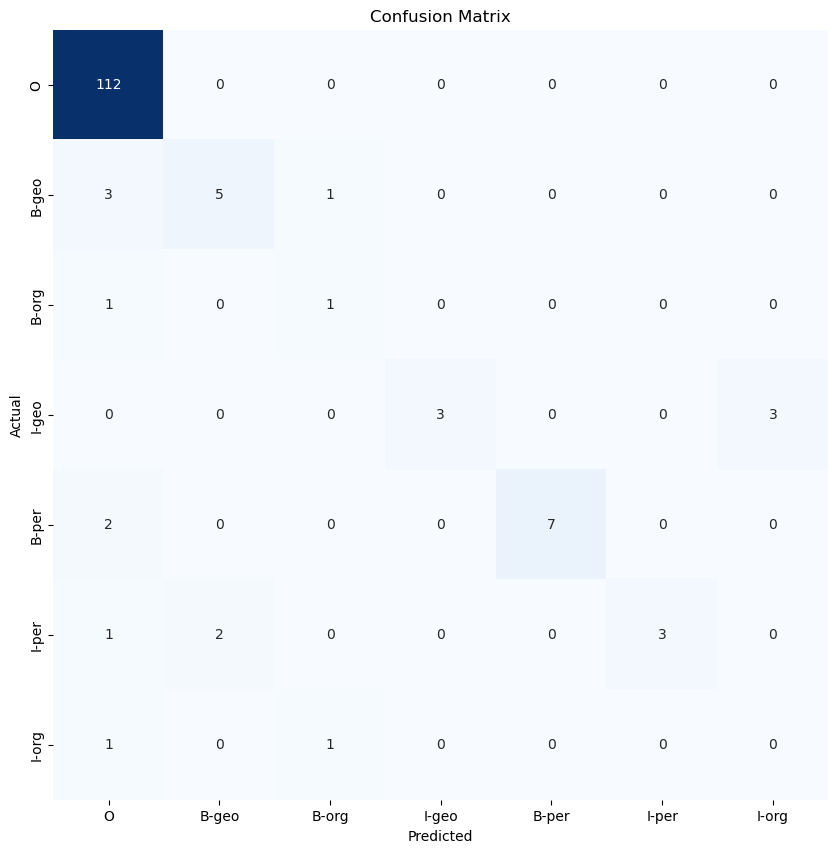

In [88]:
evaluate(y_tiny_true, y_tiny_pred, tag_dict_rev)

<div class="alert" style="padding: 20px;background-color: #2cbc84; color: white; margin-bottom: 15px;">
<h3>Structured Perceptron w/ New Features</h3>
</div>

### Load Model

In [13]:
feature_mapper_ext = ExtendedFeatures(train_seq)
feature_mapper_ext.build_features()

sp_ext = StructuredPerceptron(word_dict, tag_dict, feature_mapper_ext)
sp_ext.load_model(dir='fitted_models/02_SP_Extended_Features')

### Evaluate Model

#### Train set

In [14]:
y_train_pred = predict_SP(sp_ext, X_train)

Predicting tags: 100%|██████████| 38366/38366 [09:36<00:00, 66.55sequence/s]


Accuracy: 0.9642
F1 Score: 0.9650


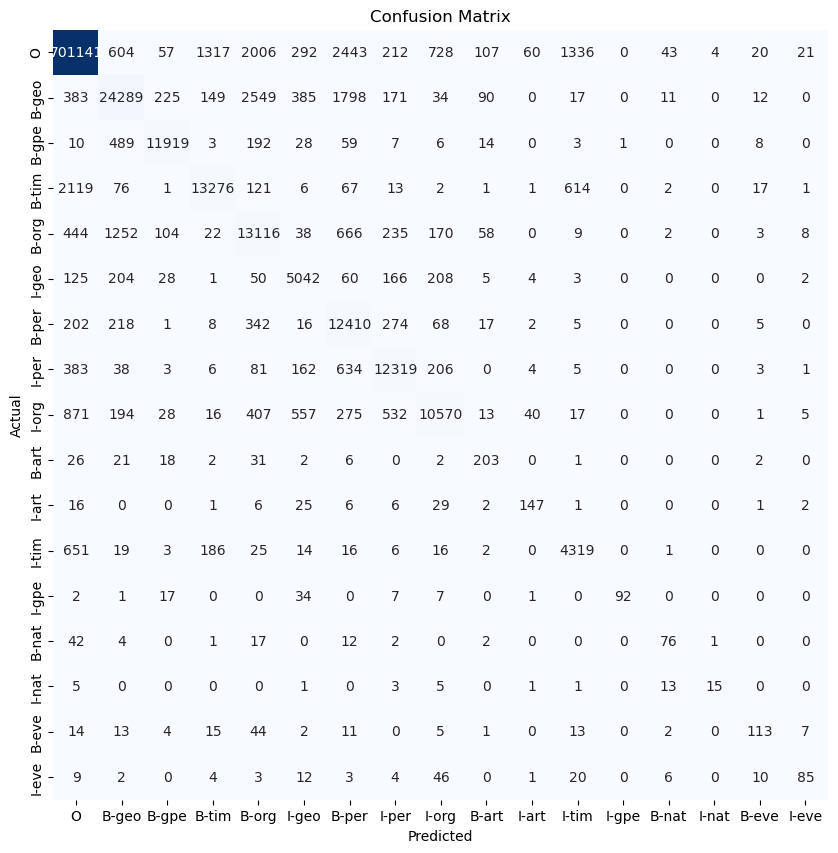

In [15]:
evaluate(y_train_true, y_train_pred, tag_dict_rev)

#### Test set

In [16]:
y_test_pred = predict_SP(sp_ext, X_test)

Predicting tags: 100%|██████████| 38367/38367 [08:56<00:00, 71.50sequence/s]


Accuracy: 0.8959
F1 Score: 0.8968


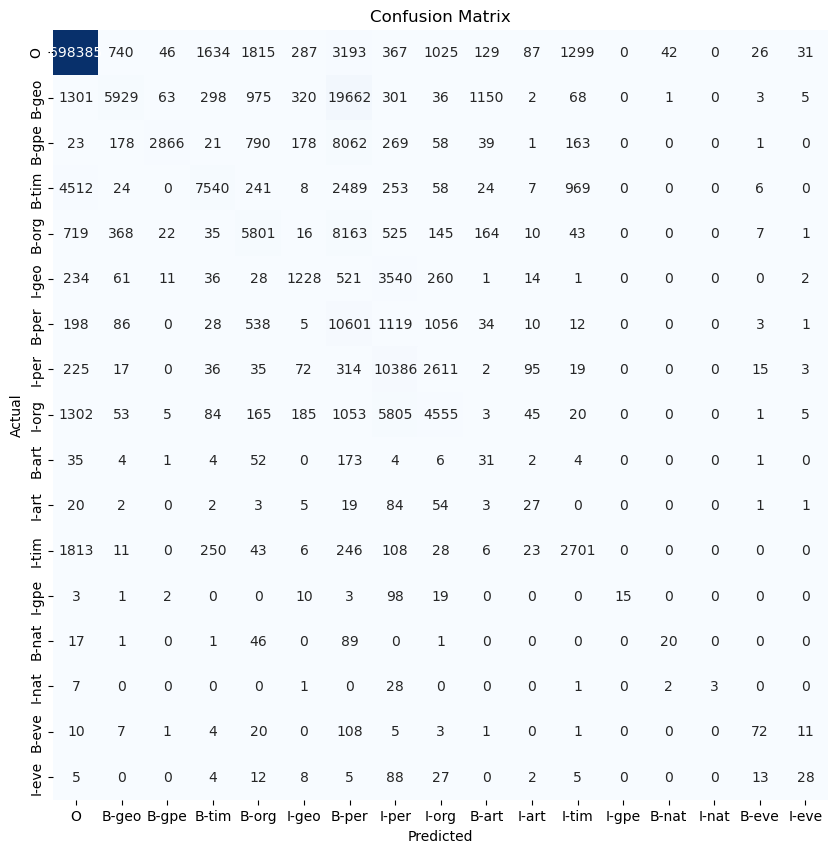

In [17]:
evaluate(y_test_true, y_test_pred, tag_dict_rev)

#### Tiny Test set

In [18]:
y_tiny_pred = predict_SP(sp_ext, X_tiny)

Predicting tags: 100%|██████████| 13/13 [00:00<00:00, 112.44sequence/s]


In [22]:
print_tiny_test_prediction(X_tiny, sp_ext, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

The/O programmers/O from/O Barchelona/B-per cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

Jack/B-per London/B-geo went/O to/O Parris/B-per ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/O and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/B-per would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O U.S.A/B-art though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 

Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 

Apple/B-org is/O a/O great/O company/O ./

Accuracy: 0.9315
F1 Score: 0.9225


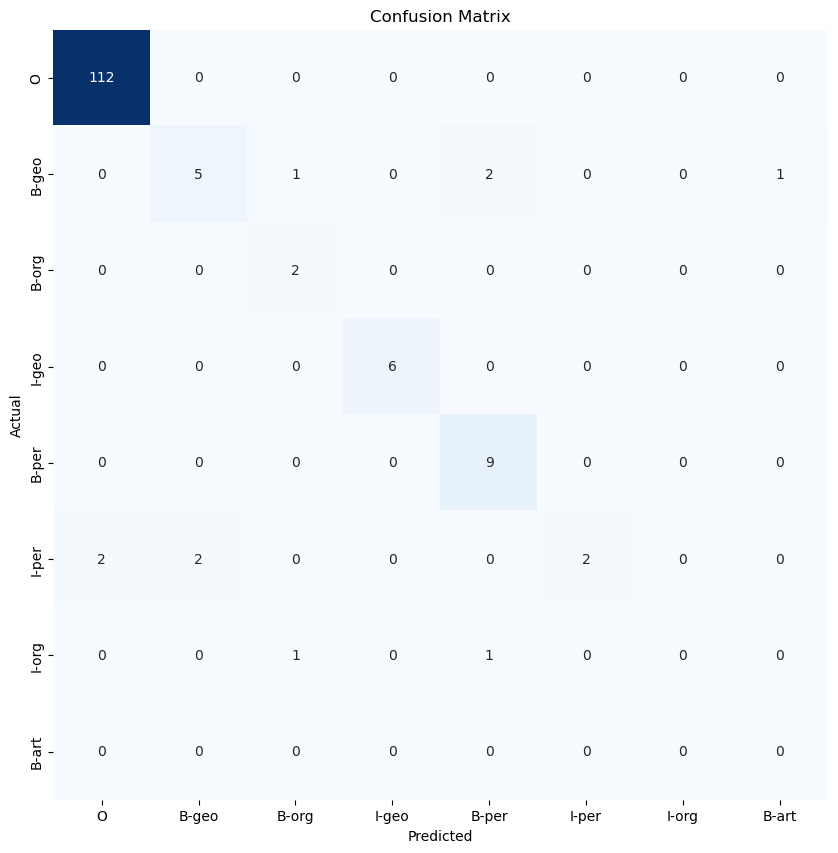

In [20]:
evaluate(y_tiny_true, y_tiny_pred, tag_dict_rev)

<div class="alert" style="padding: 20px;background-color: #2cbc84; color: white; margin-bottom: 15px;">
<h3> BERT model</h3>
</div>

### Load Model

In [10]:
bert = load_model('fitted_models/bert_model.h5',custom_objects={'TFBertModel': TFBertModel},compile=False)

### Create Train and test sets

In [15]:
sentences_train, tag_train, enc_tag_train = process_BERT_data(train)
X_train = sentences_train
y_train = tag_train
sentences_test, tag_test, enc_tag_test = process_BERT_data(test)
X_test = sentences_train
y_test = tag_train

In [16]:
input_ids,attention_mask = tokenize_BERT(X_train)
test_input_ids,test_attention_mask = tokenize_BERT(X_test)

100%|██████████| 38366/38366 [00:08<00:00, 4437.54it/s]


### Evaluate Model

TO DO!! Create functions (in utils.py) to predict and evaluate the bert model as the perceptron. Plot the confusion matrix also.
Problem--> the predict of the bert takes about 2h.

#### Train set

### Test set

In [18]:
bert.predict([test_input_ids,test_attention_mask])

   3/1199 [..............................] - ETA: 1:44:37

KeyboardInterrupt: 

### Tiny Test set